# Medical Data Visualizer

**Assignment:** In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

**Data description**

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Solution:

In [2]:
# Import data
df = pd.read_csv("medical_examination.csv")

In [3]:
#check the dataframe
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Add 'overweight' column
df['overweight'] = (df["weight"] / ((df["height"] / 100) ** 2)).apply(lambda x : 1 if x>25 else 0)


In [5]:
#check dataframe to see if column has been added
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [6]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"] = df["cholesterol"].apply(lambda x: 0 if x == 1 else 1)
df["gluc"] = df["gluc"].apply(lambda x: 0 if x == 1 else 1)

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


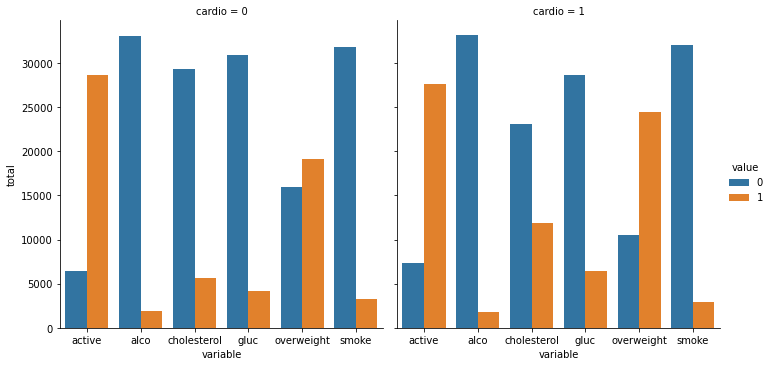

In [8]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat["total"]= 1
df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index=False).count()
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(x="variable", y="total", data = df_cat, hue="value", kind="bar", col = "cardio").fig
fig.savefig('catplot.png');


<AxesSubplot:xlabel='weight', ylabel='height'>

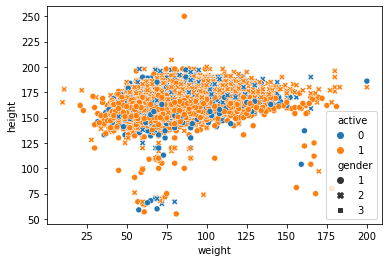

In [9]:
#create a scatterplot
sns.scatterplot(data=df, x="weight", y="height", hue="active", style="gender")

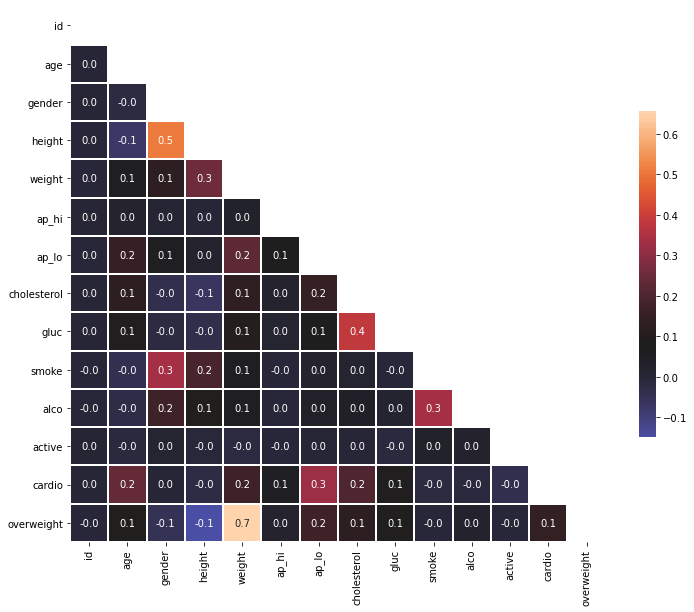

In [10]:
#draw a heatmap
# Clean the data
df_heat = df[
(df['ap_lo'] <= df['ap_hi']) &
(df['height'] >= df['height'].quantile(0.025)) &
(df['height'] <= df['height'].quantile(0.975)) &
(df['weight'] >= df['weight'].quantile(0.025))&
(df['weight'] <= df['weight'].quantile(0.975))]

# Calculate the correlation matrix
corr = df_heat.corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.triu(corr)



# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, linewidths=1, annot=True, square=True, mask=mask, fmt=".1f", center=0.08,cbar_kws={"shrink":0.5})

fig.savefig('heatmap.png')


Using the instructions given in the assignment, I was able to visualize the medical examination data with a categorical plot, scatter plot, and a heatmap. We see from the data that the age was given as the date of birth and the gender was represented in numbers. 

Considering that this data was used for code practice and will not be reported, it is safe to leave the values that way, but going forward when working with company projects, it is always best to ask what those values mean and also convert the date of birth to actual age to get the best out of the data. 

Here we don't know whether gender 1 means **Male or Female** and gender 2 means **Male or Female**. There is also gender 3 which could mean **Prefer not to say** or **Other**. These uncertainties are always best to communicate to the stakeholders and implemented when cleaning data.